In [161]:
! wget https://github.com/raghavagps/Pfeature/raw/master/PyLib/Pfeature.zip

In [162]:
! unizip Pfeature.zip

In [163]:
! unzip Pfeature.zip

In [164]:
cd Pfeature

In [165]:
! python setup.py install

In [166]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

In [167]:
! conda install -c bioconda cd-hit -y

In [168]:

! wget https://raw.githubusercontent.com/dataprofessor/AMP/main/train_po.fasta

In [169]:

! wget https://raw.githubusercontent.com/dataprofessor/AMP/main/train_ne.fasta


In [170]:

 ! cat train_ne.fasta

In [171]:
! cat train_po.fasta

In [115]:
  ! cd-hit -i train_po.fasta -o train_po_cdhit.txt -c 0.99

In [116]:
! cd-hit -i train_ne.fasta -o train_ne_cdhit.txt -c 0.99

In [117]:
! ls -l

In [118]:
! grep ">" train_po.fasta | wc -l

In [119]:
! grep ">" train_po_cdhit.txt | wc -l

In [120]:
! grep ">" train_ne.fasta | wc -l

In [121]:
! grep ">" train_ne_cdhit.txt | wc -l

In [122]:
 import pandas as pd 

In [123]:
from Pfeature.pfeature import aac_wp

def aac(input):
  a = input.rstrip('txt')
  output = a + 'aac.csv'
  df_out = aac_wp(input, output)
  df_in = pd.read_csv(output)
  return df_in

aac('train_po_cdhit.txt')

,AAC_A,AAC_C,AAC_D,AAC_E,AAC_F,AAC_G,AAC_H,AAC_I,AAC_K,AAC_L,AAC_M,AAC_N,AAC_P,AAC_Q,AAC_R,AAC_S,AAC_T,AAC_V,AAC_W,AAC_Y
0,27.27,0.00,9.09,0.00,9.09,9.09,0.00,0.00,0.00,0.00,0.00,9.09,9.09,0.00,0.00,0.00,0.00,18.18,0.00,9.09
1,0.00,54.55,0.00,9.09,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,18.18,18.18,0.00,0.00,0.00
2,0.00,0.00,9.09,18.18,9.09,9.09,9.09,0.00,0.00,9.09,9.09,0.00,18.18,0.00,0.00,0.00,0.00,9.09,0.00,0.00
3,0.00,0.00,0.00,18.18,9.09,9.09,9.09,0.00,0.00,9.09,9.09,9.09,18.18,0.00,0.00,0.00,0.00,9.09,0.00,0.00
4,0.00,0.00,9.09,18.18,18.18,9.09,0.00,0.00,0.00,9.09,9.09,9.09,18.18,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1332,10.00,0.00,3.33,3.33,6.67,20.00,0.00,3.33,13.33,13.33,3.33,0.00,0.00,3.33,0.00,6.67,3.33,10.00,0.00,0.00
1333,6.67,3.33,0.00,0.00,3.33,20.00,6.67,3.33,3.33,6.67,0.00,6.67,0.00,3.33,6.67,10.00,3.33,13.33,3.33,0.00
1334,13.33,0.00,0.00,3.33,0.00,3.33,13.33,0.00,0.00,10.00,0.00,0.00,16.67,6.67,16.67,6.67,3.33,0.00,0.00,6.67
1335,6.67,0.00,6.67,6.67,0.00,6.67,3.33,6.67,6.67,26.67,0.00,3.33,0.00,10.00,10.00,3.33,3.33,0.00,0.00,0.00


In [124]:
pos='train_po_cdhit.txt'

In [125]:
neg='train_ne_cdhit.txt'

In [126]:
def feature_calc(po ,ne,feature_name):
  po_feature=feature_name(po)
  ne_feature=feature_name(ne)
  po_class=pd.Series(['positive' for i in range(len(po_feature))])
  ne_class=pd.Series(['negative' for i in range(len(ne_feature))])
  po_ne_class=pd.concat([po_class ,ne_class],axis=0)
  po_ne_class.name='class'
  po_ne_feature=pd.concat([po_feature ,ne_feature],axis=0)
  df=pd.concat([po_ne_feature, po_ne_class],axis=1)
  return df
feature=feature_calc(pos,neg,aac)
feature



,AAC_A,AAC_C,AAC_D,AAC_E,AAC_F,AAC_G,AAC_H,AAC_I,AAC_K,AAC_L,...,AAC_N,AAC_P,AAC_Q,AAC_R,AAC_S,AAC_T,AAC_V,AAC_W,AAC_Y,class
0,27.27,0.00,9.09,0.00,9.09,9.09,0.00,0.00,0.00,0.00,...,9.09,9.09,0.00,0.00,0.00,0.00,18.18,0.00,9.09,positive
1,0.00,54.55,0.00,9.09,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,18.18,18.18,0.00,0.00,0.00,positive
2,0.00,0.00,9.09,18.18,9.09,9.09,9.09,0.00,0.00,9.09,...,0.00,18.18,0.00,0.00,0.00,0.00,9.09,0.00,0.00,positive
3,0.00,0.00,0.00,18.18,9.09,9.09,9.09,0.00,0.00,9.09,...,9.09,18.18,0.00,0.00,0.00,0.00,9.09,0.00,0.00,positive
4,0.00,0.00,9.09,18.18,18.18,9.09,0.00,0.00,0.00,9.09,...,9.09,18.18,0.00,0.00,0.00,0.00,0.00,0.00,0.00,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1417,13.33,0.00,3.33,3.33,0.00,13.33,0.00,3.33,26.67,10.00,...,3.33,3.33,3.33,0.00,0.00,3.33,0.00,10.00,0.00,negative
1418,6.67,0.00,0.00,3.33,6.67,20.00,3.33,3.33,13.33,13.33,...,0.00,3.33,10.00,0.00,6.67,3.33,3.33,0.00,0.00,negative
1419,6.67,20.00,0.00,3.33,0.00,10.00,0.00,6.67,10.00,3.33,...,3.33,6.67,0.00,0.00,6.67,6.67,10.00,0.00,6.67,negative
1420,6.67,0.00,3.33,3.33,6.67,0.00,3.33,3.33,3.33,6.67,...,16.67,3.33,6.67,10.00,6.67,0.00,13.33,0.00,3.33,negative


In [127]:
feature

,AAC_A,AAC_C,AAC_D,AAC_E,AAC_F,AAC_G,AAC_H,AAC_I,AAC_K,AAC_L,...,AAC_N,AAC_P,AAC_Q,AAC_R,AAC_S,AAC_T,AAC_V,AAC_W,AAC_Y,class
0,27.27,0.00,9.09,0.00,9.09,9.09,0.00,0.00,0.00,0.00,...,9.09,9.09,0.00,0.00,0.00,0.00,18.18,0.00,9.09,positive
1,0.00,54.55,0.00,9.09,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,18.18,18.18,0.00,0.00,0.00,positive
2,0.00,0.00,9.09,18.18,9.09,9.09,9.09,0.00,0.00,9.09,...,0.00,18.18,0.00,0.00,0.00,0.00,9.09,0.00,0.00,positive
3,0.00,0.00,0.00,18.18,9.09,9.09,9.09,0.00,0.00,9.09,...,9.09,18.18,0.00,0.00,0.00,0.00,9.09,0.00,0.00,positive
4,0.00,0.00,9.09,18.18,18.18,9.09,0.00,0.00,0.00,9.09,...,9.09,18.18,0.00,0.00,0.00,0.00,0.00,0.00,0.00,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1417,13.33,0.00,3.33,3.33,0.00,13.33,0.00,3.33,26.67,10.00,...,3.33,3.33,3.33,0.00,0.00,3.33,0.00,10.00,0.00,negative
1418,6.67,0.00,0.00,3.33,6.67,20.00,3.33,3.33,13.33,13.33,...,0.00,3.33,10.00,0.00,6.67,3.33,3.33,0.00,0.00,negative
1419,6.67,20.00,0.00,3.33,0.00,10.00,0.00,6.67,10.00,3.33,...,3.33,6.67,0.00,0.00,6.67,6.67,10.00,0.00,6.67,negative
1420,6.67,0.00,3.33,3.33,6.67,0.00,3.33,3.33,3.33,6.67,...,16.67,3.33,6.67,10.00,6.67,0.00,13.33,0.00,3.33,negative


In [128]:
X=feature.drop('class',axis=1)
Y=feature['class']


In [129]:
X

,AAC_A,AAC_C,AAC_D,AAC_E,AAC_F,AAC_G,AAC_H,AAC_I,AAC_K,AAC_L,AAC_M,AAC_N,AAC_P,AAC_Q,AAC_R,AAC_S,AAC_T,AAC_V,AAC_W,AAC_Y
0,27.27,0.00,9.09,0.00,9.09,9.09,0.00,0.00,0.00,0.00,0.00,9.09,9.09,0.00,0.00,0.00,0.00,18.18,0.00,9.09
1,0.00,54.55,0.00,9.09,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,18.18,18.18,0.00,0.00,0.00
2,0.00,0.00,9.09,18.18,9.09,9.09,9.09,0.00,0.00,9.09,9.09,0.00,18.18,0.00,0.00,0.00,0.00,9.09,0.00,0.00
3,0.00,0.00,0.00,18.18,9.09,9.09,9.09,0.00,0.00,9.09,9.09,9.09,18.18,0.00,0.00,0.00,0.00,9.09,0.00,0.00
4,0.00,0.00,9.09,18.18,18.18,9.09,0.00,0.00,0.00,9.09,9.09,9.09,18.18,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1417,13.33,0.00,3.33,3.33,0.00,13.33,0.00,3.33,26.67,10.00,3.33,3.33,3.33,3.33,0.00,0.00,3.33,0.00,10.00,0.00
1418,6.67,0.00,0.00,3.33,6.67,20.00,3.33,3.33,13.33,13.33,3.33,0.00,3.33,10.00,0.00,6.67,3.33,3.33,0.00,0.00
1419,6.67,20.00,0.00,3.33,0.00,10.00,0.00,6.67,10.00,3.33,0.00,3.33,6.67,0.00,0.00,6.67,6.67,10.00,0.00,6.67
1420,6.67,0.00,3.33,3.33,6.67,0.00,3.33,3.33,3.33,6.67,3.33,16.67,3.33,6.67,10.00,6.67,0.00,13.33,0.00,3.33


In [130]:
Y

0       positive
1       positive
2       positive
3       positive
4       positive
          ...   
1417    negative
1418    negative
1419    negative
1420    negative
1421    negative
Name: class, Length: 2759, dtype: object

In [131]:
#encoding the Y class 
Y=Y.map({"positive":1 , "negative":0})

In [132]:
X.shape

(2759, 20)

In [133]:
Y

0       1
1       1
2       1
3       1
4       1
       ..
1417    0
1418    0
1419    0
1420    0
1421    0
Name: class, Length: 2759, dtype: int64

In [134]:
from sklearn.feature_selection import VarianceThreshold

In [135]:
fs=VarianceThreshold(threshold=0.1)
fs.fit_transform(X)
X2=X.loc[:,fs.get_support()]
X2

,AAC_A,AAC_C,AAC_D,AAC_E,AAC_F,AAC_G,AAC_H,AAC_I,AAC_K,AAC_L,AAC_M,AAC_N,AAC_P,AAC_Q,AAC_R,AAC_S,AAC_T,AAC_V,AAC_W,AAC_Y
0,27.27,0.00,9.09,0.00,9.09,9.09,0.00,0.00,0.00,0.00,0.00,9.09,9.09,0.00,0.00,0.00,0.00,18.18,0.00,9.09
1,0.00,54.55,0.00,9.09,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,18.18,18.18,0.00,0.00,0.00
2,0.00,0.00,9.09,18.18,9.09,9.09,9.09,0.00,0.00,9.09,9.09,0.00,18.18,0.00,0.00,0.00,0.00,9.09,0.00,0.00
3,0.00,0.00,0.00,18.18,9.09,9.09,9.09,0.00,0.00,9.09,9.09,9.09,18.18,0.00,0.00,0.00,0.00,9.09,0.00,0.00
4,0.00,0.00,9.09,18.18,18.18,9.09,0.00,0.00,0.00,9.09,9.09,9.09,18.18,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1417,13.33,0.00,3.33,3.33,0.00,13.33,0.00,3.33,26.67,10.00,3.33,3.33,3.33,3.33,0.00,0.00,3.33,0.00,10.00,0.00
1418,6.67,0.00,0.00,3.33,6.67,20.00,3.33,3.33,13.33,13.33,3.33,0.00,3.33,10.00,0.00,6.67,3.33,3.33,0.00,0.00
1419,6.67,20.00,0.00,3.33,0.00,10.00,0.00,6.67,10.00,3.33,0.00,3.33,6.67,0.00,0.00,6.67,6.67,10.00,0.00,6.67
1420,6.67,0.00,3.33,3.33,6.67,0.00,3.33,3.33,3.33,6.67,3.33,16.67,3.33,6.67,10.00,6.67,0.00,13.33,0.00,3.33


In [136]:
from sklearn.model_selection import train_test_split
X_train ,X_test,y_train ,y_test=train_test_split(X2,Y,test_size=0.2,random_state =42, stratify=Y)

In [137]:
! pip install lazypredict

In [138]:
import lazypredict 

In [139]:
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import matthews_corrcoef
x=feature.drop(columns=['class'])
y=feature['class']
X_train,X_test,y_train,y_test =train_test_split(X,Y,test_size=0.2,stratify=Y)
clf=LazyClassifier(verbose=0,ignore_warnings=True,custom_metric=matthews_corrcoef)
model_train ,predictions_train=clf.fit(X_train,X_train,y_train,y_train)
#model_test , prediction_test=clf.fit(X_train ,X_test,y_train ,y_test)



100%|██████████| 29/29 [00:08<00:00,  3.46it/s]


In [140]:
model_train

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,matthews_corrcoef,Time Taken
Model,,,,,,
RandomForestClassifier,0.93,0.93,0.93,0.93,0.86,1.06
LabelSpreading,0.93,0.93,0.93,0.93,0.86,0.78
LabelPropagation,0.93,0.93,0.93,0.93,0.86,0.52
DecisionTreeClassifier,0.93,0.93,0.93,0.93,0.87,0.06
ExtraTreeClassifier,0.93,0.93,0.93,0.93,0.87,0.02
ExtraTreesClassifier,0.93,0.93,0.93,0.93,0.87,0.41
LGBMClassifier,0.92,0.92,0.92,0.92,0.85,0.35
BaggingClassifier,0.92,0.92,0.92,0.92,0.84,0.18
NuSVC,0.86,0.86,0.86,0.86,0.72,1.06


In [141]:
model_test , prediction_test=clf.fit(X_train ,X_test,y_train ,y_test)

100%|██████████| 29/29 [00:04<00:00,  6.05it/s]


In [142]:
model_test

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,matthews_corrcoef,Time Taken
Model,,,,,,
SVC,0.74,0.74,0.74,0.74,0.48,0.37
QuadraticDiscriminantAnalysis,0.73,0.74,0.74,0.73,0.48,0.02
NuSVC,0.73,0.73,0.73,0.73,0.47,0.41
LogisticRegression,0.73,0.73,0.73,0.73,0.45,0.03
XGBClassifier,0.72,0.73,0.73,0.72,0.45,0.19
RidgeClassifierCV,0.72,0.72,0.72,0.72,0.44,0.03
RidgeClassifier,0.72,0.72,0.72,0.72,0.44,0.02
LinearDiscriminantAnalysis,0.72,0.72,0.72,0.72,0.44,0.03
LinearSVC,0.72,0.72,0.72,0.72,0.44,0.25


In [143]:
y_test

1       1
1142    0
231     0
552     1
850     0
       ..
630     1
520     0
818     1
493     1
1173    0
Name: class, Length: 552, dtype: int64

[(0.0, 1.0)]

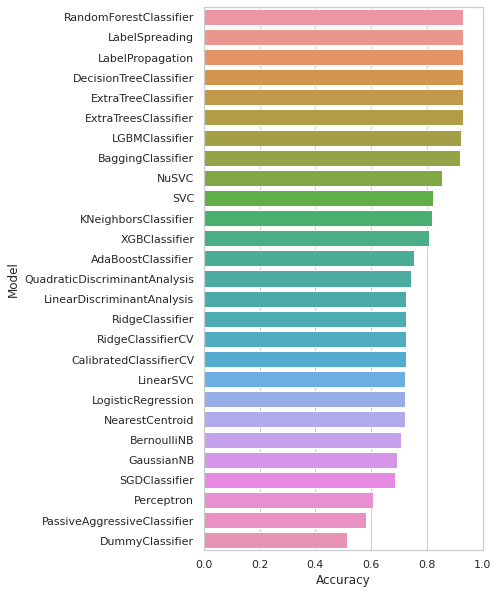

In [144]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(5,10))
sns.set_theme(style="whitegrid")
ax=sns.barplot(y=model_train.index , x="Accuracy" ,data=model_train)
ax.set(xlim=(0,1))

[(0.0, 1.0)]

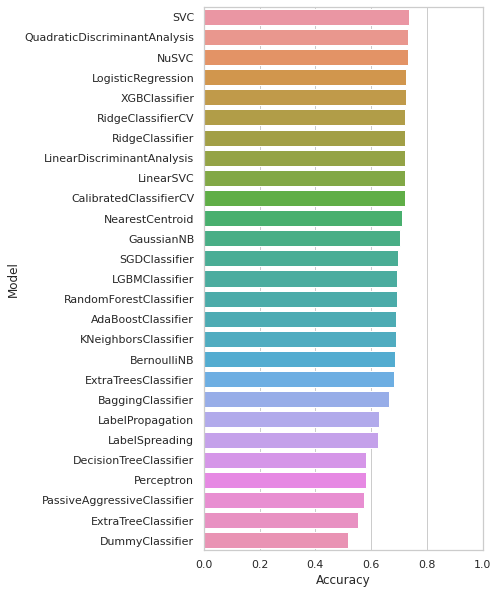

In [145]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(5,10))
sns.set_theme(style="whitegrid")
ax=sns.barplot(y=model_test.index , x="Accuracy" ,data=model_test)
ax.set(xlim=(0,1))

In [147]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=500)
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=500)

In [153]:
y_predict=rf.predict(X_test)

In [154]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict)

0.6811594202898551

In [155]:
from sklearn.svm import SVC
model=SVC()

In [156]:
model.fit(X_train,y_train)

SVC()

In [157]:
from sklearn import metrics

In [158]:
model.score(X_test,y_test)

0.7463768115942029